# What are the most demanded skills for the top 3 most popular data roles?
## Methodology
#### Clean-up skill column
#### Calculate skill count based on job_title_short
#### Calculate skill percentage
#### Plot final findings

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

df = pd.read_csv(r"C:\Users\DELL\Desktop\70K Data Analysis\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

In [2]:
df_US = df[df['job_country']=='United States']

In [5]:
df_skills = df_US.explode('job_skills')

df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,NaN
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,NaN
785705,Data Analyst,sql
785705,Data Analyst,python


In [31]:
df_US['job_title_short'].value_counts()

job_title_short
Data Analyst                 67816
Data Scientist               58830
Data Engineer                35080
Senior Data Scientist        12946
Senior Data Analyst          11791
Senior Data Engineer          9289
Business Analyst              7382
Software Engineer             1814
Machine Learning Engineer      921
Cloud Engineer                 423
Name: count, dtype: int64

In [12]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending = False, inplace = True)

df_skills_count
                                     

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [16]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

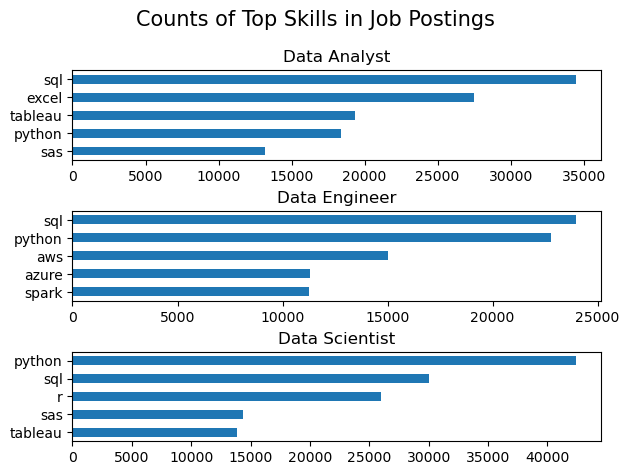

In [27]:
fig, ax = plt.subplots(len(job_titles),1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] ==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count',ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()